# Mountain car with SARSA(λ)
## Dario Pavllo

In [1]:
from agent import LearningAgent
import concurrent.futures
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Run experiment with many agents and plot the time to escape

In [2]:
tests = []
n_fig = 1

# Create a thread pool with 4 workers (this value should be equal to the number of cores)
# (actually, a process pool is used, as the global interpreter lock does not allow threads to run concurrently)
executor = concurrent.futures.ProcessPoolExecutor(max_workers=4)
def run_test(name, num_trials=100, eta=0.1, gamma=0.95, decay=0.8, t=1.0, t_decay=0.8, w0=0.0):
    global executor, tests, n_fig
    agents = []
    futures = []
    results = []
    num_agents = 10
    for i in range(num_agents):
        agent = LearningAgent(i) # Different seed for every agent
        agents.append(agent)
        futures.append(executor.submit(agent.learn, num_trials, eta, gamma, decay, t, t_decay, w0))

    for i in range(num_agents):
        results.append(futures[i].result())
        
    print('Trial ', name)
    
    # Decomment to print all values
    #for i in range(num_agents):
    #    print(results[i])
    #print('--------')
        
    data = np.asarray(results)
    tests.append(data)
    plot(data, n_fig)
    n_fig += 1
    
def plot(data, figure_idx):
    plt.figure(figure_idx, figsize=(15,3.25))
    data = np.asarray(data)
    plt.xlabel('Number of trials')
    plt.ylabel('Time to escape (seconds)')
    _ = plt.boxplot(data, showmeans=False, showfliers=False)
    xticks = []
    for i in range(data.shape[1]):
        if i % 5 == 0:
            xticks.append(str(i))
        else:
            xticks.append('')
    plt.xticks(np.arange(data.shape[1]), np.asarray(xticks))

Trial  T=10 w0=1


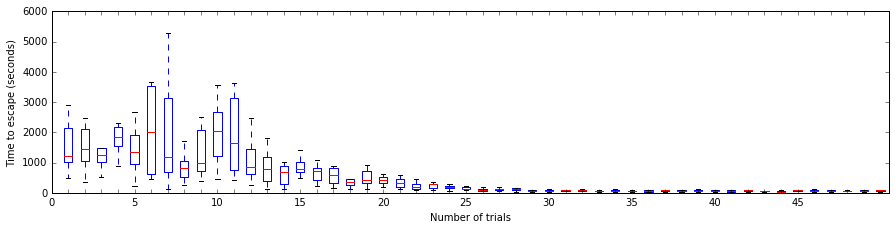

In [3]:
# May take a while to run; watch the console for progress.
run_test('T=10 w0=1', 50, 0.01, 0.95, decay=0.5, t=10.0, t_decay=0.8, w0=1.0)

# Interactive visualization of the agent

In [4]:
agent = LearningAgent(1)
agent.learn(50, 0.01, 0.95, 0.95, 10, 0.8, 0.0)

Reward
Trial:  0  - Temperature:  8.0  - Time to escape:  1403
Reward
Trial:  1  - Temperature:  6.4  - Time to escape:  630
Reward
Trial:  2  - Temperature:  5.120000000000001  - Time to escape:  2793
Reward
Trial:  3  - Temperature:  4.096000000000001  - Time to escape:  5978
Reward
Trial:  4  - Temperature:  3.276800000000001  - Time to escape:  556
Reward
Trial:  5  - Temperature:  2.621440000000001  - Time to escape:  1832
Reward
Trial:  6  - Temperature:  2.097152000000001  - Time to escape:  585
Reward
Trial:  7  - Temperature:  1.6777216000000008  - Time to escape:  2312
Reward
Trial:  8  - Temperature:  1.3421772800000007  - Time to escape:  874
Reward
Trial:  9  - Temperature:  1.0737418240000005  - Time to escape:  869
Reward
Trial:  10  - Temperature:  0.8589934592000005  - Time to escape:  2496
Reward
Trial:  11  - Temperature:  0.6871947673600004  - Time to escape:  639
Reward
Trial:  12  - Temperature:  0.5497558138880003  - Time to escape:  468
Reward
Trial:  13  - Temp

[1403,
 630,
 2793,
 5978,
 556,
 1832,
 585,
 2312,
 874,
 869,
 2496,
 639,
 468,
 1101,
 2457,
 978,
 309,
 770,
 736,
 2183,
 2319,
 1484,
 1345,
 2785,
 2387,
 2233,
 1921,
 83,
 111,
 128,
 234,
 126,
 157,
 101,
 55,
 113,
 91,
 59,
 52,
 70,
 46,
 93,
 77,
 26,
 72,
 57,
 76,
 29,
 52,
 60]

In [5]:
# Show the GUI with a sample simulation
%matplotlib auto
agent.visualize_trial()

Using matplotlib backend: Qt4Agg
t = 0.0 None
t = 1.0 None


C:\Anaconda3\lib\site-packages\matplotlib\backend_bases.py:2437: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


t = 2.0 None
t = 3.0 None
t = 4.0 None
t = 5.0 None
t = 6.0 None
t = 7.0 None
t = 8.0 None
t = 9.0 None
t = 10.0 None
t = 11.0 None
t = 12.0 None
t = 13.0 None
t = 14.0 None
t = 15.0 None
t = 16.0 None
t = 17.0 None
t = 18.0 None
t = 19.0 None
t = 20.0 None
t = 21.0 None
t = 22.0 None
t = 23.0 None
t = 24.0 None
t = 25.0 None
t = 26.0 None
t = 27.0 None
t = 28.0 None
t = 29.0 None
t = 30.0 None
t = 31.0 None
t = 32.0 None
t = 33.0 None
t = 34.0 None
t = 35.0 None
t = 36.0 None
t = 37.0 None
t = 38.0 None
t = 39.0 None
t = 40.0 None
t = 41.0 None
t = 42.0 None
t = 43.0 None
t = 44.0 None
t = 45.0 None
t = 46.0 None
t = 47.0 None
t = 48.0 None
t = 49.0 None
t = 50.0 None
t = 51.0 None
t = 52.0 None
t = 53.0 None
t = 54.0 None
t = 55.0 None
t = 56.0 None
t = 57.0 None
t = 58.0 None
t = 59.0 None
t = 60.0 None
t = 61.0 None
t = 62.0 None
t = 63.0 None
reward obtained at t =  64.0


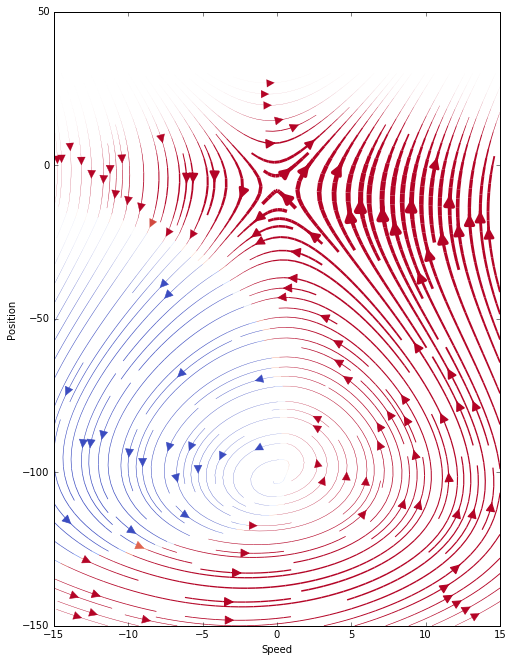

In [6]:
%matplotlib inline

# Stream plot visualization
x_min = -150.0
x_max = 30.0
x_n = 100

v_min = -15.0
v_max = 15.0
v_n = 50

x_c = np.linspace(x_min, x_max, x_n)
v_c = np.linspace(v_min, v_max, v_n)

x_dir = np.empty((x_n, v_n))
v_dir = np.empty((x_n, v_n))
im = np.empty((x_n, v_n, 3))
color = np.empty((x_n, v_n))
q = np.empty((x_n, v_n))
for i, x in enumerate(x_c):
    for j, v in enumerate(v_c):
        inputs = agent._compute_inputs(x, v)
        outputs = agent._compute_outputs(inputs, agent.W)
        im[i, j] = outputs
        agent.mountain_car.x = x
        agent.mountain_car.x_d = v
        action = np.argmax(outputs)
        color[i, j] = action/2
        agent.mountain_car.apply_force(action - 1)
        agent.mountain_car.simulate_timesteps(100, 0.01)
        x_dir[i, j] = agent.mountain_car.x - x
        v_dir[i, j] = agent.mountain_car.x_d - v
        q[i, j] = outputs[action]
        
Y, X = np.mgrid[-150:30:100j, -15:15:50j]
plt.figure(figsize=(8, 11))
plt.streamplot(X, Y, v_dir, x_dir, linewidth=q*5, color=color, cmap='coolwarm', density=2.0, arrowsize=2)
plt.xlabel('Speed')
plt.ylabel('Position')